<a href="https://colab.research.google.com/github/ShravaniAnilPatil/Codes/blob/main/BI%20Exp-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving movies_encoded (1).csv to movies_encoded (1) (1).csv
reached
   Rank           Release Group   $Worldwide    $Domestic  Domestic %  \
0     1  Mission: Impossible II  546388108.0  215409889.0        39.4   
1     2               Gladiator  460583960.0  187705427.0        40.8   
2     3               Cast Away  429632142.0  233632142.0        54.4   
3     4         What Women Want  374111707.0  182811707.0        48.9   
4     5                Dinosaur  349822765.0  137748063.0        39.4   

      $Foreign  Foreign %  Year  Rating  Vote_Count  ... History  Horror  \
0  330978219.0       60.6  2000   6.126      6741.0  ...       0       0   
1  272878533.0       59.2  2000   8.217     19032.0  ...       0       0   
2  196000000.0       45.6  2000   7.663     11403.0  ...       0       0   
3  191300000.0       51.1  2000   6.450      3944.0  ...       0       0   
4  212074702.0       60.6  2000   6.544      2530.0  ...       0       0   

   Music  Mystery  Romance  Science 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


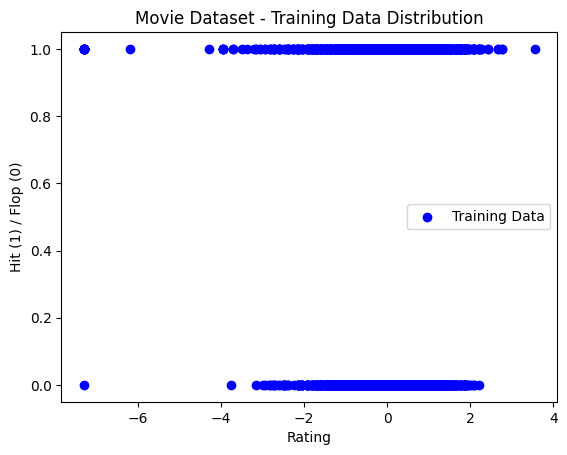

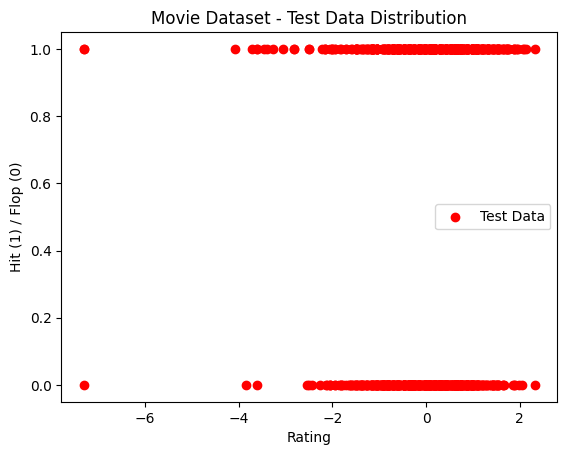

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from google.colab import files
import pandas as pd
# Upload file manually
uploaded = files.upload()
print("reached")


# Load the dataset
data = pd.read_csv(list(uploaded.keys())[0])

# Display first few rows
print(data.head())

# Drop unnecessary columns
columns_to_drop = ['Rank', 'Release Group', '$Worldwide', '$Domestic', '$Foreign']
# data = data.drop(columns=columns_to_drop, axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Original_Language'] = label_encoder.fit_transform(data['Original_Language'])

# Select features and target variable
features = ['Domestic %', 'Foreign %', 'Year', 'Rating', 'Vote_Count', 'Original_Language',
            'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
            'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
            'TV Movie', 'Thriller', 'War', 'Western']
X = data[features]
y = (data['Foreign %'] > data['Foreign %'].median()).astype(int)  # Hit = 1, Flop = 0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Train Naïve Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict a new movie's box office success
new_movie = np.array([[50, 50, 2023, 7.5, 5000, 21, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]])  # Example
new_movie = scaler.transform(new_movie)  # Apply the same scaling

print("Using Decision Tree:")
print(dtc.predict(new_movie))

print("Using Naïve Bayes:")
print(nb.predict(new_movie))

# Predict test set results
y_pred_dtc = dtc.predict(X_test)
y_pred_nb = nb.predict(X_test)

# Evaluate using confusion matrix and accuracy
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print("Confusion Matrix (Decision Tree):\n", cm_dtc)
print("Accuracy Score (Decision Tree):", accuracy_dtc)

cm_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Confusion Matrix (Naïve Bayes):\n", cm_nb)
print("Accuracy Score (Naïve Bayes):", accuracy_nb)

# Visualization of Training Set
plt.scatter(X_train[:, 3], y_train, c="blue", label="Training Data")  # Rating vs Hit/Flop
plt.xlabel("Rating")
plt.ylabel("Hit (1) / Flop (0)")
plt.title("Movie Dataset - Training Data Distribution")
plt.legend()
plt.show()

# Visualization of Test Set
plt.scatter(X_test[:, 3], y_test, c="red", label="Test Data")  # Rating vs Hit/Flop
plt.xlabel("Rating")
plt.ylabel("Hit (1) / Flop (0)")
plt.title("Movie Dataset - Test Data Distribution")
plt.legend()
plt.show()
